# 팔각형 액추에이터 패턴개수: 1개~10개 (층단위.판과 판사이를 1층이라고 가정)

In [96]:
import pandas as pd    ##제목이랑 그래프 타이틀 붙이기
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# -50kPa하에서 패턴 개수가 1~10개일 때 Force-displacement 그래프

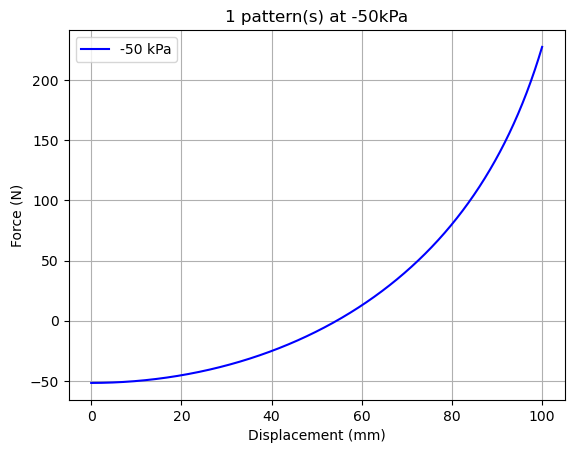

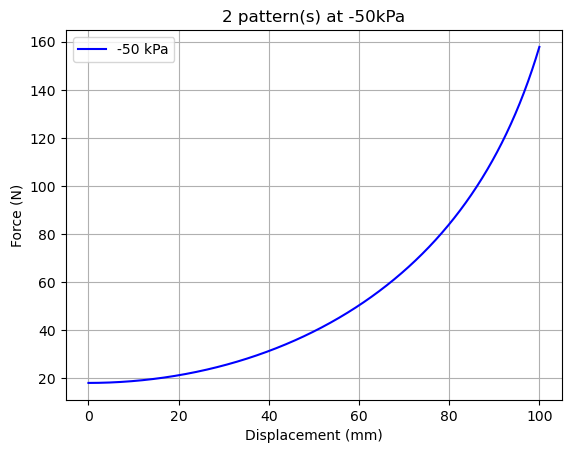

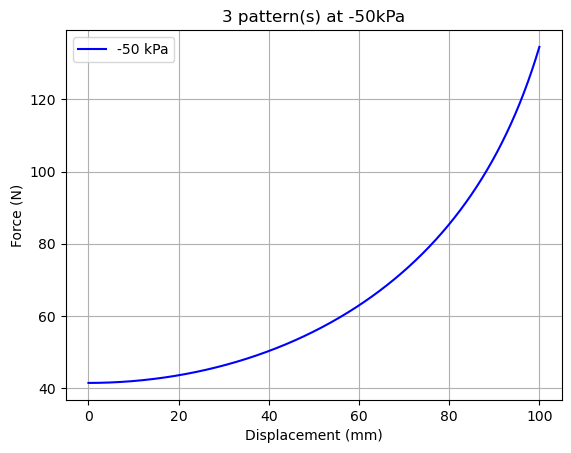

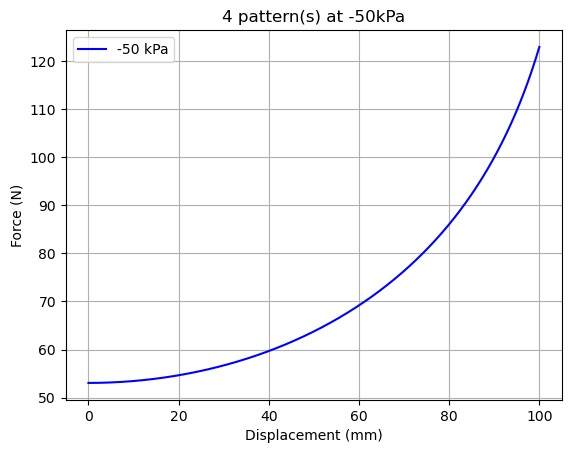

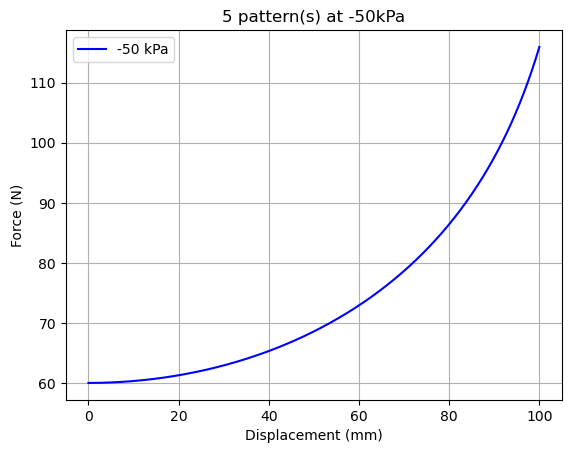

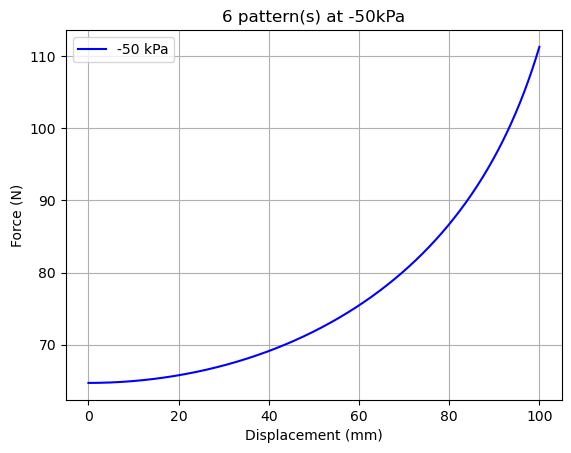

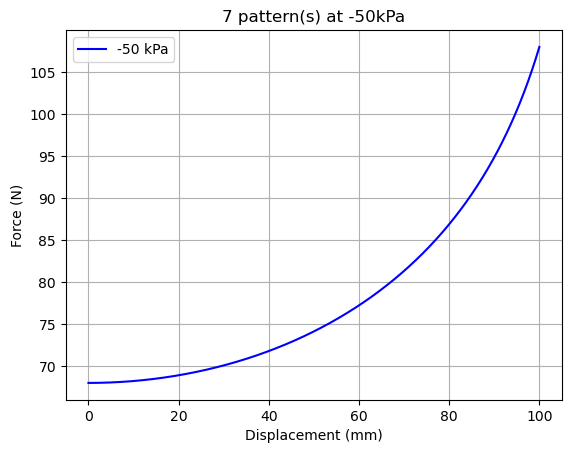

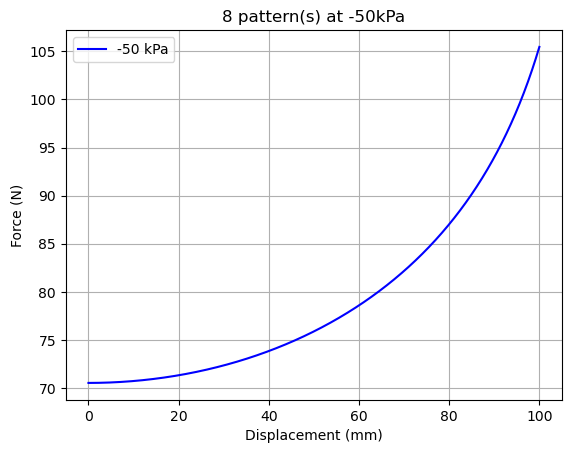

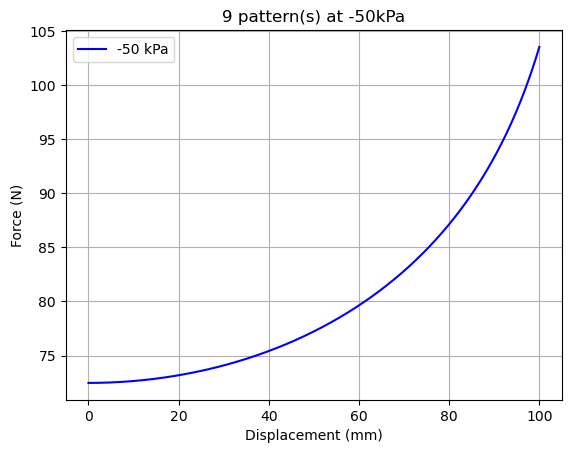

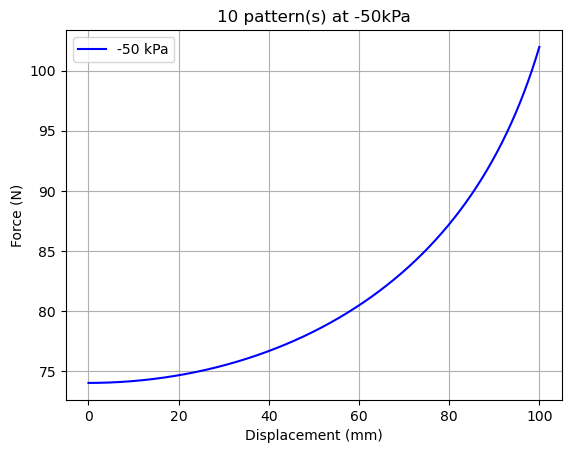

In [97]:
theta = np.linspace(np.pi/180*60,0,1000) # rad

d = 10.2*10**-3
P = -50*10**3
F_MAX = np.zeros(11)
F_MIN = np.zeros(11)
F_DIF = np.zeros(11)

for i in range(1,11):
    
    L0=100/i/np.sin(np.pi/3)*10**-3
    L = L0*np.sin(theta)
    D = 27*10**-3
    L_tot = i*L*1000
    A = 2*(1+2**0.5)*D**2
    dL = L0*np.cos(theta)
    dT = dL/(L0*np.cos(theta))

    dV = A*0.5*L0*np.cos(theta)*dT-1/6*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

    F = -P*dV/dL
    
    F_MAX[i] = F[np.abs(L_tot - 100).argmin()] 
    F_MIN[i] = F[np.abs(L_tot).argmin()] 
    F_DIF[i] = F_MAX[i] - F_MIN[i]

    plt.plot(L_tot,F,'b-', label='-50 kPa')
    plt.xlabel('Displacement (mm)')
    plt.ylabel('Force (N)')

    plt.legend()
    plt.grid(True)
    plt.title(str(i) + ' pattern(s) at -50kPa')
    plt.show()

# 패턴 개수에 따른 F_MAX, F_MIN, F_DIFF. 그래프

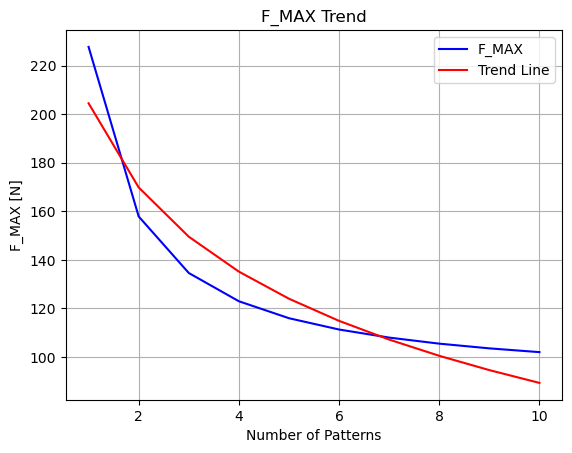

F_MAX Trend Function: a * log(x) + b
a = -50.03663099055745
b = 204.49865894347428



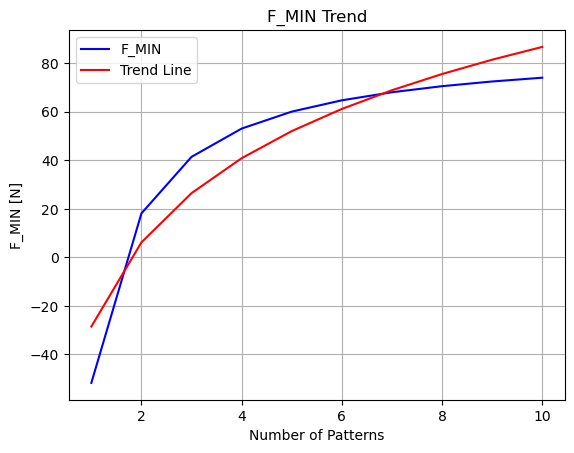

F_MIN Trend Function: a * log(x) + b
a = 50.036631063044226
b = -28.502490347901713



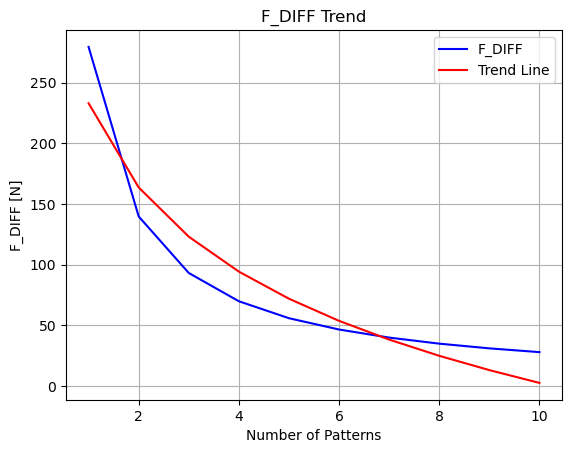

F_DIFF Trend Function: a * log(x) + b
a = -100.07326189708647
b = 233.00114904072285


In [98]:
pattern_count = range(1, 11)

# F_MAX 추세 그래프 (로그 함수)
def log_func_max(x, a, b):
    return a * np.log(x) + b

popt_max, _ = curve_fit(log_func_max, pattern_count, F_MAX[1:])

trend_max = log_func_max(pattern_count, *popt_max)
trend_function_max = log_func_max(pattern_count, *popt_max)

plt.plot(pattern_count, F_MAX[1:], 'b-', label='F_MAX')
plt.plot(pattern_count, trend_function_max, 'r-', label='Trend Line')
plt.xlabel('Number of Patterns')
plt.ylabel('F_MAX [N]')
plt.title('F_MAX Trend')
plt.legend()
plt.grid(True)
plt.show()

print("F_MAX Trend Function: a * log(x) + b")
print(f"a = {popt_max[0]}")
print(f"b = {popt_max[1]}")
print()

# F_MIN 추세 그래프 (로그 함수)
def log_func_min(x, a, b):
    return a * np.log(x) + b

popt_min, _ = curve_fit(log_func_min, pattern_count, F_MIN[1:])

trend_min = log_func_min(pattern_count, *popt_min)
trend_function_min = log_func_min(pattern_count, *popt_min)

plt.plot(pattern_count, F_MIN[1:], 'b-', label='F_MIN')
plt.plot(pattern_count, trend_function_min, 'r-', label='Trend Line')
plt.xlabel('Number of Patterns')
plt.ylabel('F_MIN [N]')
plt.title('F_MIN Trend')
plt.legend()
plt.grid(True)
plt.show()

print("F_MIN Trend Function: a * log(x) + b")
print(f"a = {popt_min[0]}")
print(f"b = {popt_min[1]}")
print()

# F_DIFF 추세 그래프 (로그 함수)
def log_func_diff(x, a, b):
    return a * np.log(x) + b

popt_diff, _ = curve_fit(log_func_diff, pattern_count, F_DIF[1:])

trend_diff = log_func_diff(pattern_count, *popt_diff)
trend_function_diff = log_func_diff(pattern_count, *popt_diff)

plt.plot(pattern_count, F_DIF[1:], 'b-', label='F_DIFF')
plt.plot(pattern_count, trend_function_diff, 'r-', label='Trend Line')
plt.xlabel('Number of Patterns')
plt.ylabel('F_DIFF [N]')
plt.title('F_DIFF Trend')
plt.legend()
plt.grid(True)
plt.show()

print("F_DIFF Trend Function: a * log(x) + b")
print(f"a = {popt_diff[0]}")
print(f"b = {popt_diff[1]}")

# 패턴이 10개일때 압력에 따른 F-L 그래프

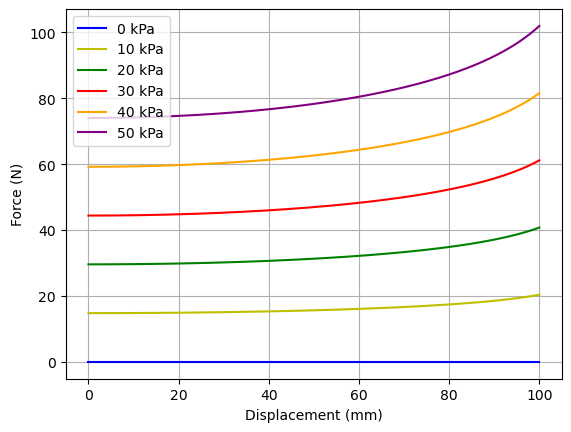

In [99]:
F=[0]*7
for i in range(0,6):
    
    P = -1 * 10* (i)*10**3 # Pa

    A = 2*(1+2**0.5)*D**2

    dL = L0*np.cos(theta)
    dT = dL/(L0*np.cos(theta))

    dV = A*0.5*L0*np.cos(theta)*dT-1/6*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

    F[i] = -P*dV/dL

   # plt.plot(L_tot,F[i])
    
    F[6] = dV/dL

    
    
    plt.xlabel('Displacement (mm)')
    plt.ylabel('Force (N)')
    
plt.plot(L_tot,F[0],'b-', label='0 kPa')
plt.plot(L_tot,F[1],'y-', label='10 kPa')
plt.plot(L_tot,F[2],'g-', label='20 kPa')
plt.plot(L_tot,F[3],'r-', label='30 kPa')
plt.plot(L_tot,F[4],'orange', label='40 kPa')
plt.plot(L_tot,F[5],'purple', label='50 kPa')

plt.legend()
plt.grid(True)
plt.show()


In [100]:
data = {
    'length': L_tot,    
    '0 kPa' : F[0],
    '10 kPa' : F[1],
    '20 kPa' : F[2],
    '30 kPa' : F[3],
    '40 kPa' : F[4],
    '50 kPa' : F[5],
    'dV/dL' : F[6]

}
frame = pd.DataFrame(data)
#pd.set_option('display.max_rows', None)  # 모든 행 보기
#pd.set_option('display.max_columns', None)  # 모든 열 보기
pd.reset_option('display.max_rows')
pd.reset_option('isplay.max_columns')

In [101]:
frame

,length,0 kPa,10 kPa,20 kPa,30 kPa,40 kPa,50 kPa,dV/dL
0,100.000000,0.0,20.393992,40.787984,61.181977,81.575969,101.969961,0.002039
1,99.939425,0.0,20.378795,40.757589,61.136384,81.515179,101.893973,0.002038
2,99.878739,0.0,20.363643,40.727286,61.090929,81.454572,101.818214,0.002036
3,99.817944,0.0,20.348537,40.697073,61.045610,81.394147,101.742684,0.002035
4,99.757040,0.0,20.333476,40.666952,61.000428,81.333903,101.667379,0.002033
5,99.696025,0.0,20.318460,40.636920,60.955380,81.273840,101.592300,0.002032
6,99.634902,0.0,20.303489,40.606978,60.910467,81.213956,101.517446,0.002030
7,99.573668,0.0,20.288563,40.577125,60.865688,81.154251,101.442814,0.002029
8,99.512325,0.0,20.273681,40.547361,60.821042,81.094723,101.368404,0.002027
9,99.450873,0.0,20.258843,40.517686,60.776528,81.035371,101.294214,0.002026


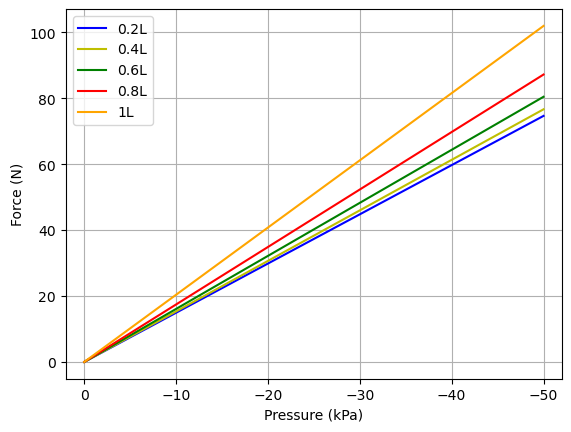

In [95]:
F_P = [0]*5
P_linspace = np.linspace(-50,0,100)  # 0~50 kPa를 쪼개기

a = [0.001493,0.001533,0.001609,0.001744,0.002039]
for i in range(0,5):
    F_P[i] = -P_linspace*a[i]*1000
    
    plt.xlabel('Pressure (kPa)')
    plt.ylabel('Force (N)')

    
plt.plot(P_linspace,F_P[0],'b-', label='0.2L')
plt.plot(P_linspace,F_P[1],'y-', label='0.4L')
plt.plot(P_linspace,F_P[2],'g-', label='0.6L')
plt.plot(P_linspace,F_P[3],'r-', label='0.8L')
plt.plot(P_linspace,F_P[4],'orange', label='1L')

plt.xlim([2, -52])

plt.legend()
plt.grid(True)
plt.show()